<a href="https://colab.research.google.com/github/dayanachankar/bharat_intern/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
warnings.filterwarnings('ignore')

**Import DataSet**


In [ ]:
house =pd.read_csv("/content/boston.csv")
house

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
house.shape

(506, 14)

In [ ]:
house.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'price'],
      dtype='object')

In [ ]:
# To Check the null values
house.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

In [ ]:
# statistical measures of the datasets
house.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
# To check the basic info about datatype
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


**Data Analytics**

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'price'}>, <Axes: >, <Axes: >]],
      dtype=object)

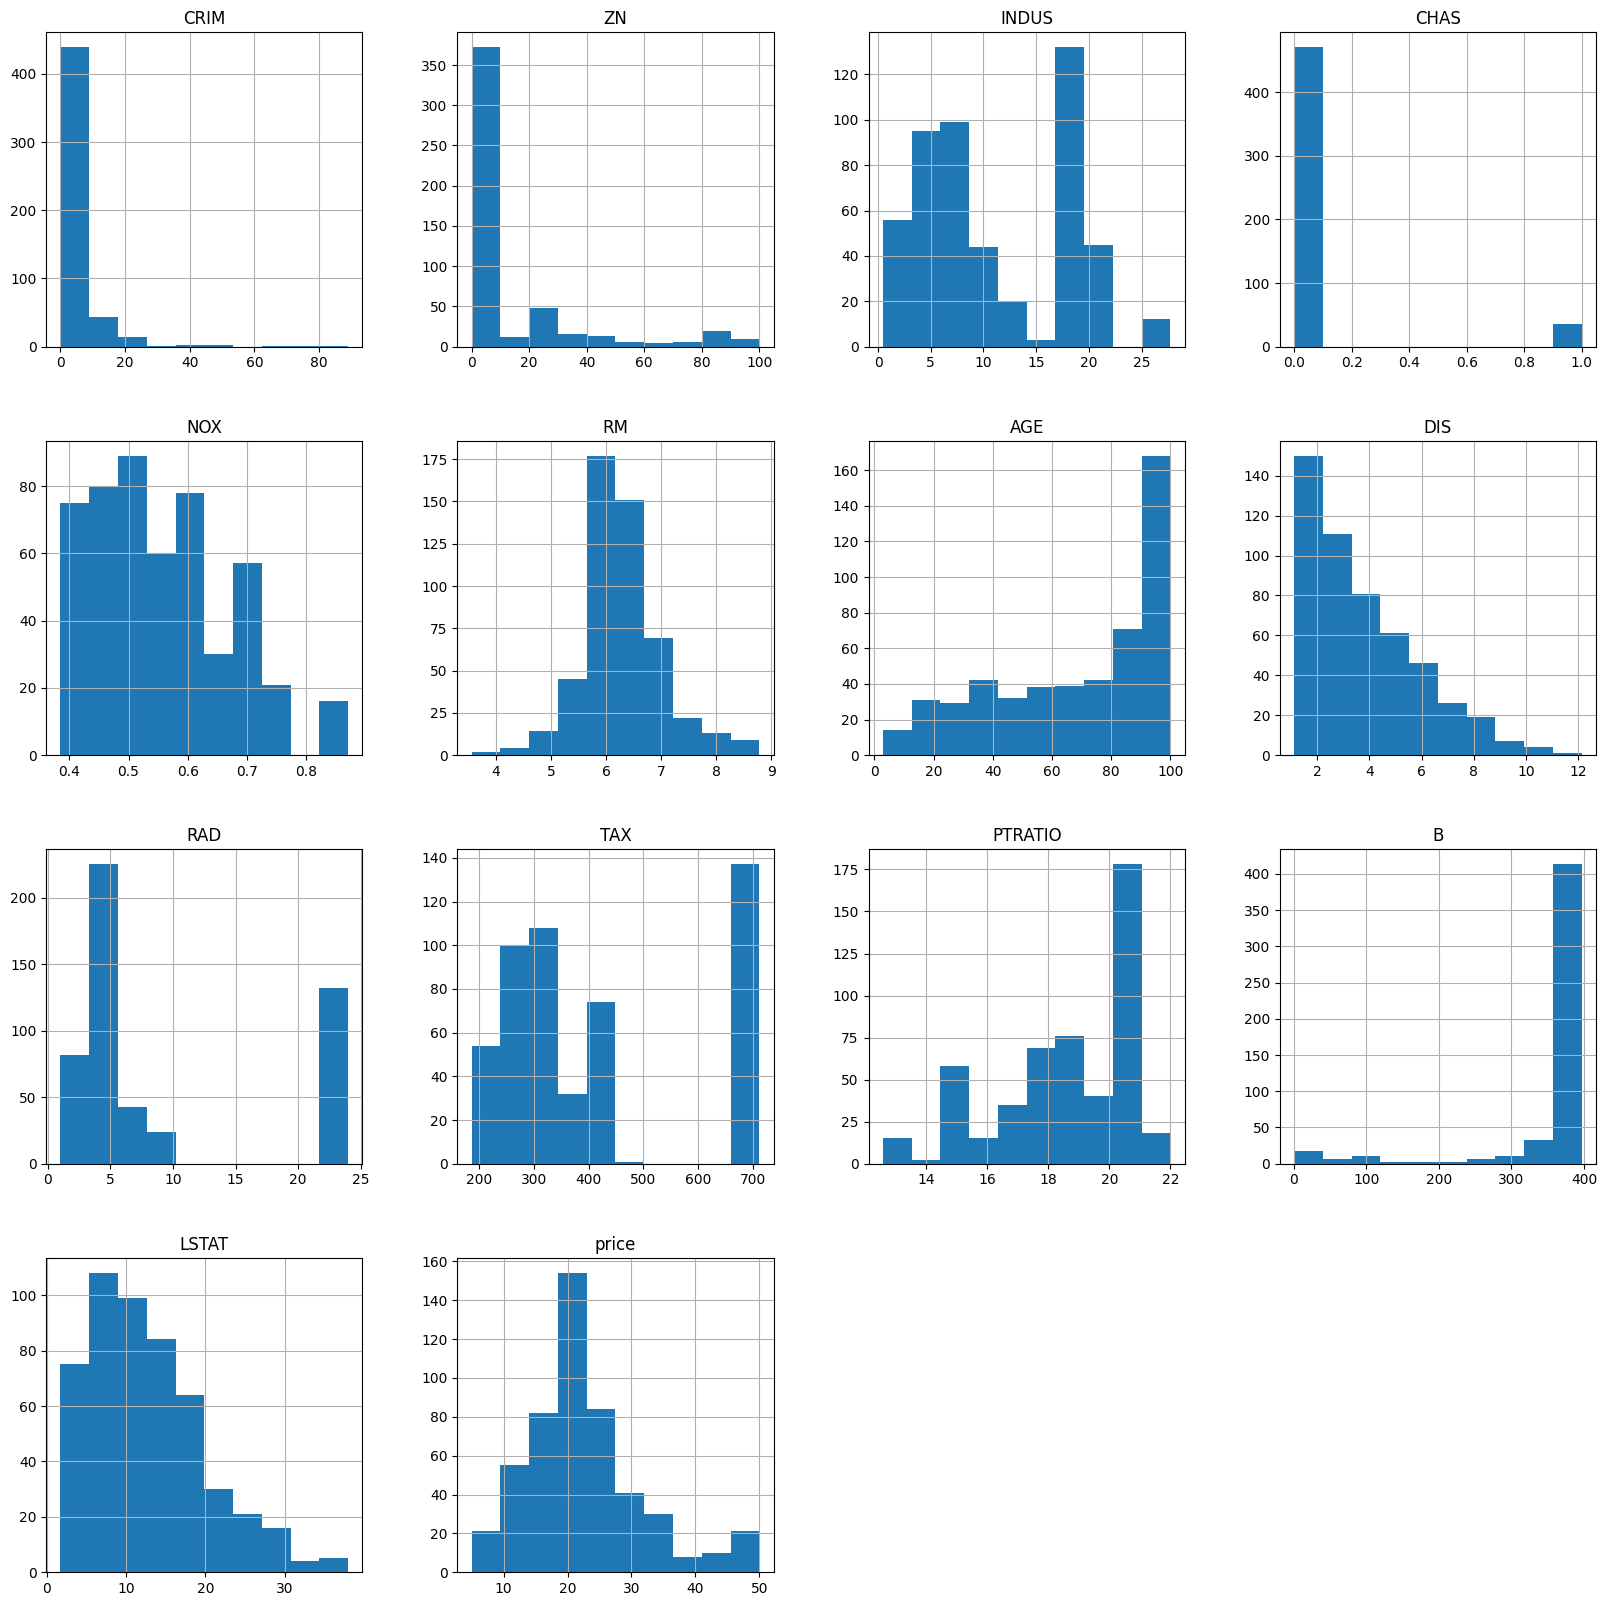

In [ ]:
house.hist(figsize =(20,20))


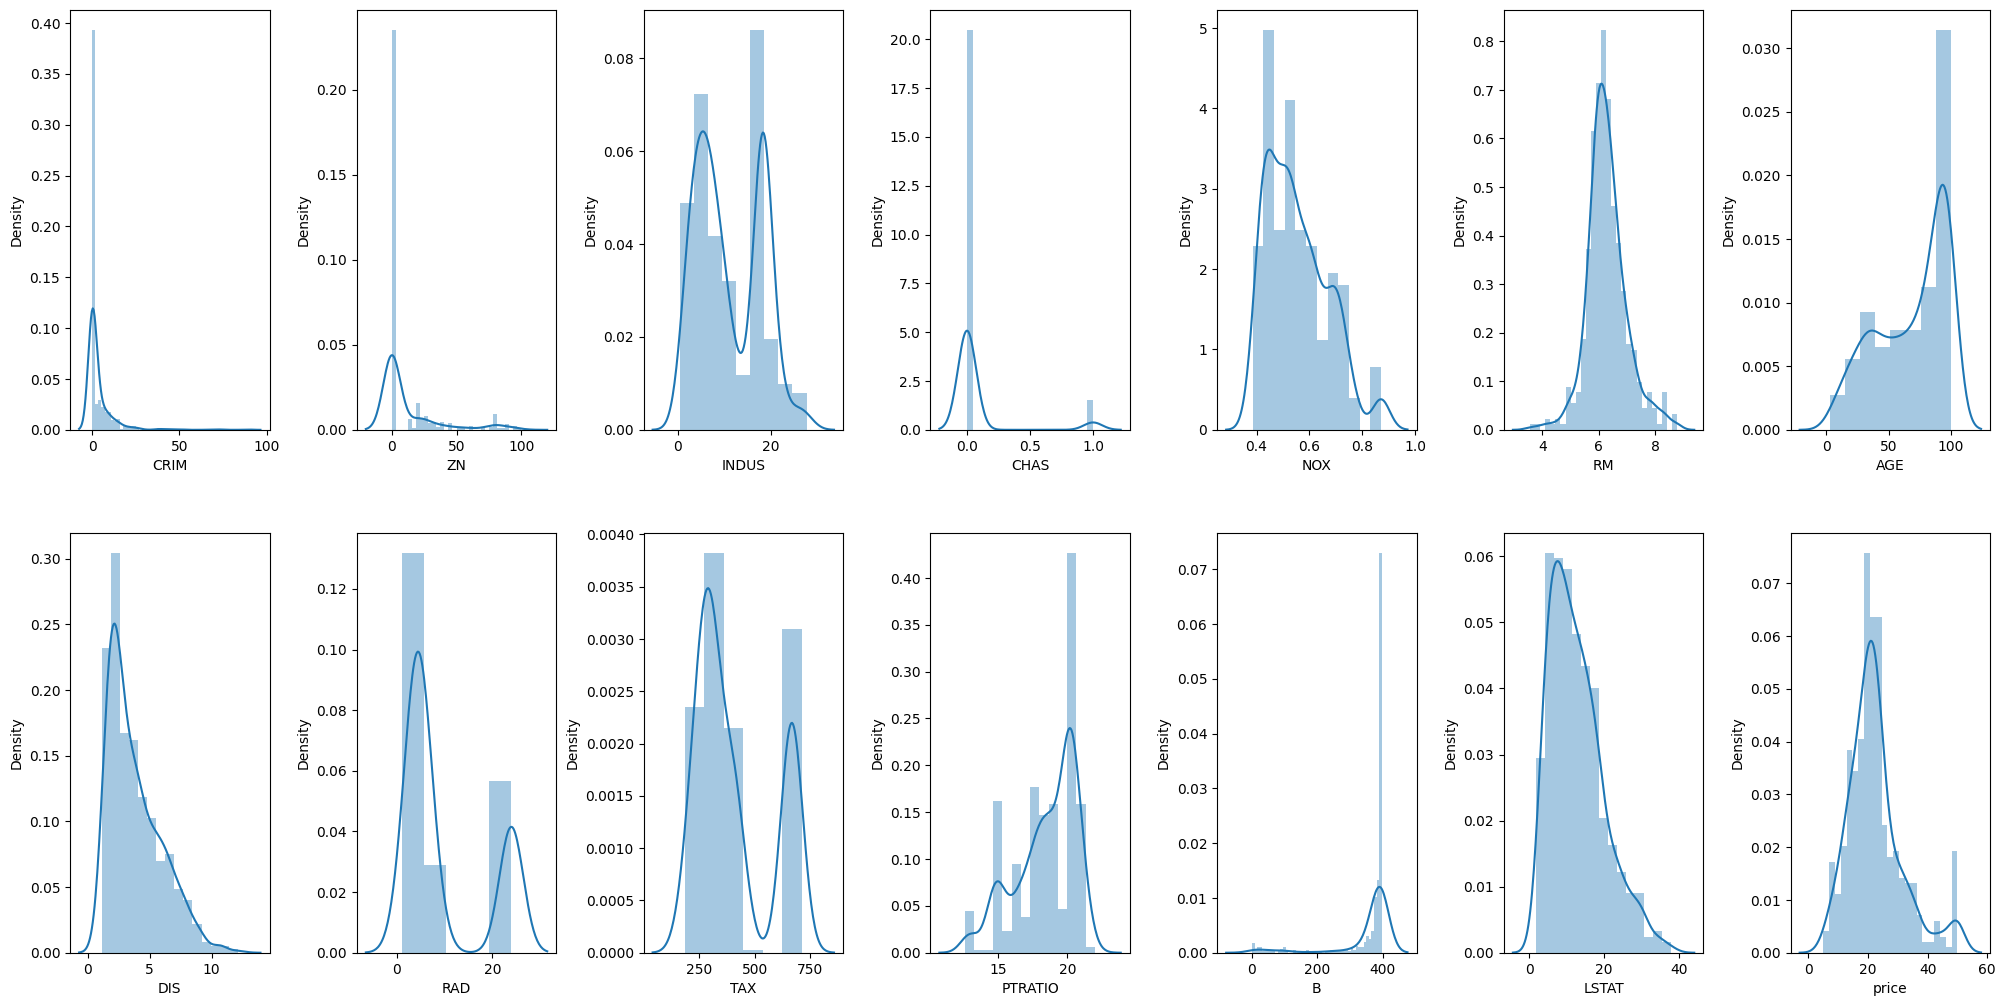

In [ ]:
# Create distplot
fig,ax = plt.subplots(ncols=7,nrows=2,figsize=(20,10))
index=0
ax=ax.flatten()

for col,value in house.items():
  sns.distplot(value,ax=ax[index])
  index += 1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=4.0)

**Correlation Matrix**

In [ ]:
correlation = house.corr()

<Axes: >

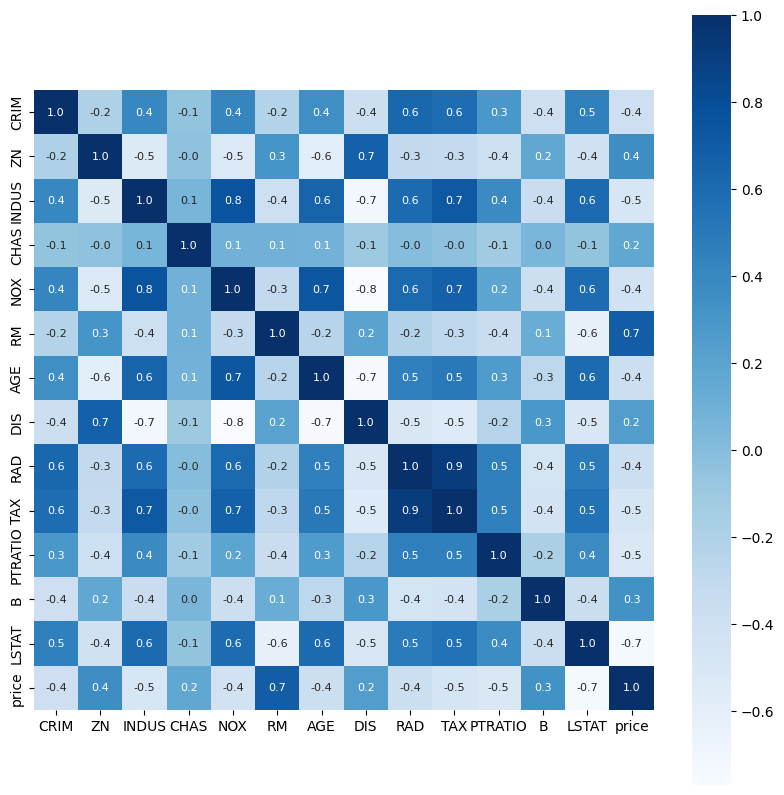

In [ ]:
#constructing a heatmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

<Axes: xlabel='RM', ylabel='price'>

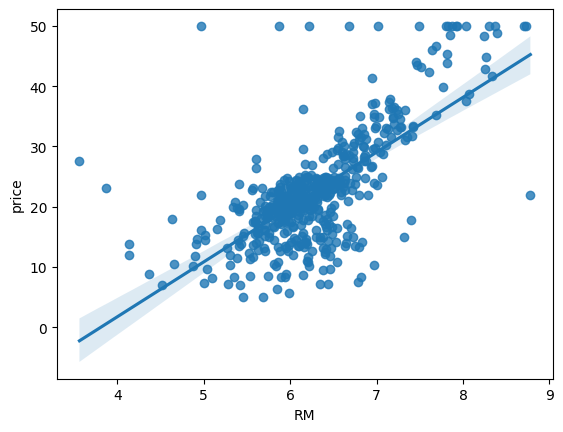

In [ ]:
sns.regplot(y=house['price'],x=house['RM'])

**Model Training**

In [ ]:
x = house.drop(columns=['price','RAD'])
y = house['price']


In [ ]:
print(x)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  TAX  PTRATIO  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900  296     15.3   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671  242     17.8   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671  242     17.8   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622  222     18.7   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622  222     18.7   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...      ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786  273     21.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875  273     21.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675  273     21.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889  273     21.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050  273     21.0   

          B  LSTAT  
0    396.90   4.98  
1    396.90   9.14  
2    392.83 

In [ ]:
print(y)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: price, Length: 506, dtype: float64


In [ ]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
def train(model, X, y):
    # train the model
    x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42)
    model.fit(x_train, y_train)

    # predict the training set
    pred = model.predict(x_test)

    # perform cross-validation
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))

    print("Model Report")
    print("MSE:",mean_squared_error(y_test, pred))
    print('CV Score:', cv_score)

In [ ]:
print('x_train.shape :',x_train.shape)
print('x_test.shape :',x_test.shape)
print('y_train.shape :',x_train.shape)
print('y_test.shape:', y_test.shape)

x_train.shape : (404, 12)
x_test.shape : (102, 12)
y_train.shape : (404, 12)
y_test.shape: (102,)


Model Report
MSE: 23.871005067364855
CV Score: 35.581366210769275


<Axes: title={'center': 'Model Coefficients'}>

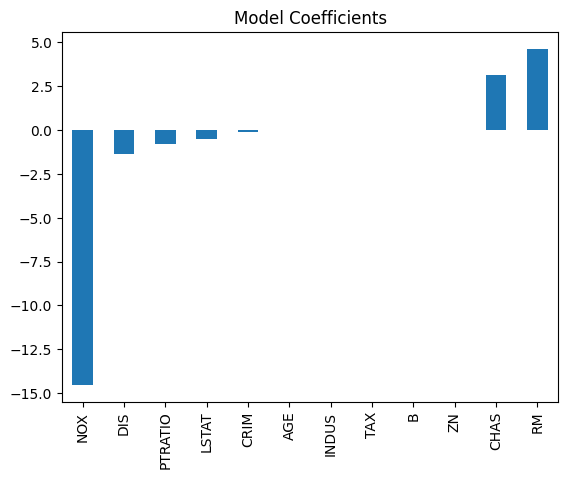

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
train(model, x, y)
coef = pd.Series(model.coef_, x.columns).sort_values()
coef.plot(kind='bar', title='Model Coefficients')

Model Report
MSE: 20.36866141732284
CV Score: 38.80070452339352


<Axes: title={'center': 'Feature Importance'}>

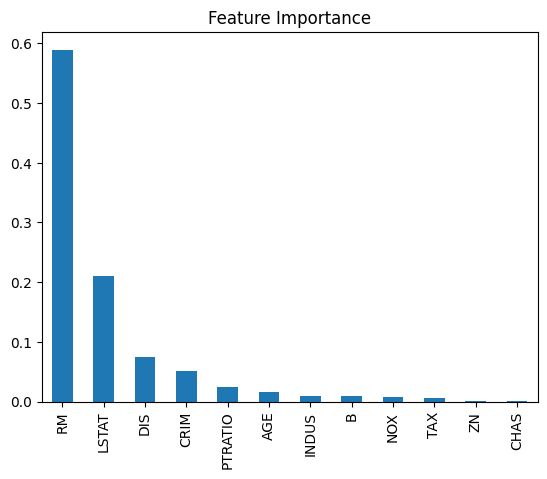

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model, x, y)
coef = pd.Series(model.feature_importances_, x.columns).sort_values(ascending=False)
coef.plot(kind='bar', title='Feature Importance')

Model Report
MSE: 10.351701456692913
CV Score: 20.9738841715395


<Axes: title={'center': 'Feature Importance'}>

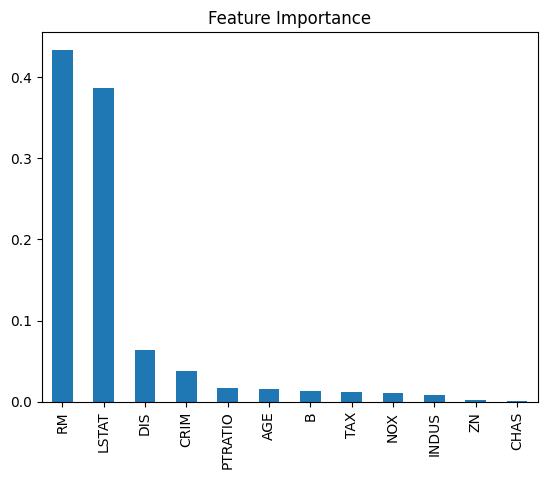

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
train(model, x, y)
coef = pd.Series(model.feature_importances_, x.columns).sort_values(ascending=False)
coef.plot(kind='bar', title='Feature Importance')